In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m 

import countries as c
from read_dataframe import generate_df

importlib is imported in order to support changes to bespoke modules 

In [2]:
import importlib
import qcut_func as q

q = importlib.reload(q)

Firstly we will read the dataset into a variable df. This is the current working set up due to issues with storing large data files on Git. 

A basic review of the dataframe is performed, gauging the completeness of the data

In [3]:
df = generate_df()
df

country_or_area                commodity_transaction  year  \
0             Austria   Additives and Oxygenates - Exports  1996   
1             Austria   Additives and Oxygenates - Exports  1995   
2             Belgium   Additives and Oxygenates - Exports  2014   
3             Belgium   Additives and Oxygenates - Exports  2013   
4             Belgium   Additives and Oxygenates - Exports  2012   
...               ...                                  ...   ...   
89478        Viet Nam  Electricity - total wind production  2012   
89479        Viet Nam  Electricity - total wind production  2011   
89480        Viet Nam  Electricity - total wind production  2010   
89481        Viet Nam  Electricity - total wind production  2009   
89482        Viet Nam  Electricity - total wind production  2008   

                          unit  quantity  quantity_footnotes  \
0       Metric tons,  thousand       5.0                 NaN   
1       Metric tons,  thousand      17.0                 NaN   
2       Metric tons,  thousand       0.0                 NaN   
3       Metric tons,  thousand       0.0                 NaN   
4       Metric tons,  thousand      35.0                 NaN   
...                        ...       ...                 ...   
89478  Kilowatt-hours, million      92.0                 1.0   
89479  Kilowatt-hours, million      87.0                 NaN   
89480  Kilowatt-hours, million      50.0                 NaN   
89481  Kilowatt-hours, million      10.0                 NaN   
89482  Kilowatt-hours, million       1.0                 NaN   

                       category  
0      additives_and_oxygenates  
1      additives_and_oxygenates  
2      additives_and_oxygenates  
3      additives_and_oxygenates  
4      additives_and_oxygenates  
...                         ...  
89478          wind_electricity  
89479          wind_electricity  
89480          wind_electricity  
89481          wind_electricity  
89482          wind_electricity  

[1189482 rows x 7 columns]

In [4]:
df.head()

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates

In [5]:
# for i in range(1,13):
#     if i == 1:
#         df = pd.read_csv('raw_data/all_energy_statistics' + str(i) +'.csv')
#         df_cols = df.columns.to_list()
#     else:
#         df1 = pd.read_csv('raw_data/all_energy_statistics' + str(i) + '.csv',header=None)
#         df1.columns = df_cols
#         df = df.append(df1) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189482 entries, 0 to 89482
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 72.6+ MB


In [7]:
df.head()

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189482 entries, 0 to 89482
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 72.6+ MB


Here we see that one column offers little value as it contains either 1 or nothing. There is no documentation to explain what this column denotes so we will ignore it going forward

In [9]:
footnotes_nan = df.drop_duplicates('quantity_footnotes')
footnotes_nan

country_or_area                  commodity_transaction  year  \
0           Austria     Additives and Oxygenates - Exports  1996   
622        Colombia  Additives and Oxygenates - Production  2014   

                       unit  quantity  quantity_footnotes  \
0    Metric tons,  thousand      5.00                 NaN   
622  Metric tons,  thousand     34.53                 1.0   

                     category  
0    additives_and_oxygenates  
622  additives_and_oxygenates

Below is an investigation into whether any commodities are expressed in multiple units. The risk here is that if these rows are included in any plots/ models they could massively skew the results.

In [10]:
categories_and_units = df.drop_duplicates(['unit', 'commodity_transaction'])

print('There are ' + str(categories_and_units.shape[0]) + ' rows and ' + str(categories_and_units['commodity_transaction'].nunique()) + ' unique commodity transactions')


There are 2468 rows and 2452 unique commodity transactions


After dropping duplicate entries, there are 2452 commods with 2468 rows suggesting some commods have multilpe units.

Below we count the instances of a commodity_transaction and only output those that are repeated. This shows 16 repeats meaning we should be careful using plots with these commodities

In [11]:
multi_units = categories_and_units['commodity_transaction'].value_counts(sort= True)
multi_units_list = list(multi_units.index[multi_units == 2])
multi_units_list

['From other sources – Main activity – CHP plants',
 'From other sources – Autoproducer',
 'Geothermal – Autoproducer',
 'Geothermal – Main activity – CHP plants',
 'Solar thermal – Main activity',
 'Nuclear – Main activity – CHP plants',
 'From other sources – Main activity',
 'From other sources – Autoproducer – CHP plants',
 'From combustible fuels – Main activity',
 'Nuclear – Main activity',
 'From combustible fuels – Main activity – CHP plants',
 'Geothermal – Autoproducer – CHP plants',
 'Solar thermal – Autoproducer',
 'Geothermal – Main activity',
 'From combustible fuels – Autoproducer',
 'From combustible fuels – Autoproducer – CHP plants']

In [12]:
categories_and_units[categories_and_units['commodity_transaction'].isin(multi_units_list)][['country_or_area', 
                                                                                            'commodity_transaction', 
                                                                                            'year', 
                                                                                            'unit', 
                                                                                            'quantity', 
                                                                                            'category']]

country_or_area                              commodity_transaction  \
34029         Austria              From combustible fuels – Autoproducer   
34665         Austria  From combustible fuels – Autoproducer – CHP pl...   
35715         Albania             From combustible fuels – Main activity   
36847         Armenia  From combustible fuels – Main activity – CHP p...   
39023         Denmark                  From other sources – Autoproducer   
39149         Finland     From other sources – Autoproducer – CHP plants   
39282         Czechia                 From other sources – Main activity   
39360         Czechia    From other sources – Main activity – CHP plants   
39454         Austria                          Geothermal – Autoproducer   
39508         Romania             Geothermal – Autoproducer – CHP plants   
39566         Austria                         Geothermal – Main activity   
39769         Iceland            Geothermal – Main activity – CHP plants   
62983        Bulgaria                            Nuclear – Main activity   
63136        Bulgaria               Nuclear – Main activity – CHP plants   
63263        Slovakia                       Solar thermal – Autoproducer   
63296         Austria                      Solar thermal – Main activity   
43313     Afghanistan              From combustible fuels – Autoproducer   
46911       Australia  From combustible fuels – Autoproducer – CHP pl...   
49631     Afghanistan             From combustible fuels – Main activity   
55100         Armenia  From combustible fuels – Main activity – CHP p...   
58755         Belgium                  From other sources – Autoproducer   
58925         Denmark     From other sources – Autoproducer – CHP plants   
59138         Belgium                 From other sources – Main activity   
59280         Finland    From other sources – Main activity – CHP plants   
59443      Costa Rica                          Geothermal – Autoproducer   
59534     New Zealand             Geothermal – Autoproducer – CHP plants   
59612       Australia                         Geothermal – Main activity   
60090         Iceland            Geothermal – Main activity – CHP plants   
65566       Argentina                            Nuclear – Main activity   
66322         Hungary               Nuclear – Main activity – CHP plants   
69777   United States                       Solar thermal – Autoproducer   
69786       Australia                      Solar thermal – Main activity   

       year                     unit      quantity           category  
34029  2014               Terajoules  10022.000000               heat  
34665  2014               Terajoules   9423.000000               heat  
35715  2014               Terajoules    213.520000               heat  
36847  2014               Terajoules    127.000000               heat  
39023  2014               Terajoules   2488.000000               heat  
39149  2012               Terajoules      5.000000               heat  
39282  2014               Terajoules    340.000000               heat  
39360  2014               Terajoules    340.000000               heat  
39454  2014               Terajoules     58.000000               heat  
39508  2008               Terajoules      0.000000               heat  
39566  2014               Terajoules    485.000000               heat  
39769  2014               Terajoules   5835.000000               heat  
62983  2014               Terajoules    604.000000               heat  
63136  2014               Terajoules    604.000000               heat  
63263  2012               Terajoules      1.000000               heat  
63296  2014               Terajoules     61.000000               heat  
43313  2014  Kilowatt-hours, million      5.000000  total_electricity  
46911  2014  Kilowatt-hours, million   8956.000000  total_electricity  
49631  2014  Kilowatt-hours, million    149.000000  total_electricity  
55100  2014  Kilowatt-hours, million   3289.000000  total

This should be used as a basis check when attempting to return any insights. We should be careful of plots involving these rows.

Having checked that the data is useable we will investigate the energy usage of different countries. The first goals are to get an overview of total energy, followed by specific fuel types, broken down by country if possible.

In [13]:
fuel_total_by_country = df.groupby(['country_or_area', 'category'])['quantity'].sum()
fuel_total_by_country

country_or_area  category                                                   
Afghanistan      aviation_gasoline                                              2.400000e+01
                 charcoal                                                       1.259391e+04
                 electricity_net_installed_capacity_of_electric_power_plants    4.822800e+04
                 falling_water                                                  3.940000e+05
                 fuel_oil                                                       1.520000e+02
                                                                                    ...     
Zimbabwe         other_vegetal_material_and_residues                            1.387903e+07
                 paraffin_waxes                                                 4.800000e+01
                 thermal_electricity                                            1.085878e+05
                 total_electricity                                              1.9616

In [14]:
fuel_total_per_country = df[df['category'] == 'wind_electricity'].pivot_table(index = 'country_or_area', values = 'quantity', fill_value = True).sort_values('quantity', ascending = False)
fuel_total_per_country

quantity
country_or_area                      
China                   101641.200000
United States            40094.680000
Germany                  21780.125000
Spain                    17676.880000
India                     8356.000000
...                               ...
Azerbaijan                   1.000000
St. Helena and Depend.       0.908571
St. Pierre-Miquelon          0.856667
French Polynesia             0.464500
Republic of Moldova          0.285714

[99 rows x 1 columns]

In [15]:
df['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

As a quick solution I have copied a dictionary of countries which can be divided by continent.

The goal of this is to plot line graphs of different countries within a continent for comparison

In [16]:
countries_df = pd.DataFrame(c.countries_dict)
df_europe = df[df['country_or_area'].isin(countries_df[countries_df['continent'] == 'Europe']['name'])]

df_europe

country_or_area                commodity_transaction  year  \
0             Austria   Additives and Oxygenates - Exports  1996   
1             Austria   Additives and Oxygenates - Exports  1995   
2             Belgium   Additives and Oxygenates - Exports  2014   
3             Belgium   Additives and Oxygenates - Exports  2013   
4             Belgium   Additives and Oxygenates - Exports  2012   
...               ...                                  ...   ...   
89432  United Kingdom  Electricity - total wind production  1994   
89433  United Kingdom  Electricity - total wind production  1993   
89434  United Kingdom  Electricity - total wind production  1992   
89435  United Kingdom  Electricity - total wind production  1991   
89436  United Kingdom  Electricity - total wind production  1990   

                          unit  quantity  quantity_footnotes  \
0       Metric tons,  thousand       5.0                 NaN   
1       Metric tons,  thousand      17.0                 NaN   
2       Metric tons,  thousand       0.0                 NaN   
3       Metric tons,  thousand       0.0                 NaN   
4       Metric tons,  thousand      35.0                 NaN   
...                        ...       ...                 ...   
89432  Kilowatt-hours, million     342.0                 NaN   
89433  Kilowatt-hours, million     218.0                 NaN   
89434  Kilowatt-hours, million      40.0                 NaN   
89435  Kilowatt-hours, million      11.0                 NaN   
89436  Kilowatt-hours, million       9.0                 NaN   

                       category  
0      additives_and_oxygenates  
1      additives_and_oxygenates  
2      additives_and_oxygenates  
3      additives_and_oxygenates  
4      additives_and_oxygenates  
...                         ...  
89432          wind_electricity  
89433          wind_electricity  
89434          wind_electricity  
89435          wind_electricity  
89436          wind_electricity  

[386408 rows x 7 columns]

Below, .copy() is used to prevent chaining over multiple lines. Basically, we confirm that df_europe_elec_total_wind is a copy of df_europe, which mitigates the risk of accidentally changing df_europe. See the linked blog post for more detail https://www.dataquest.io/blog/settingwithcopywarning/

<function matplotlib.pyplot.show(close=None, block=None)>

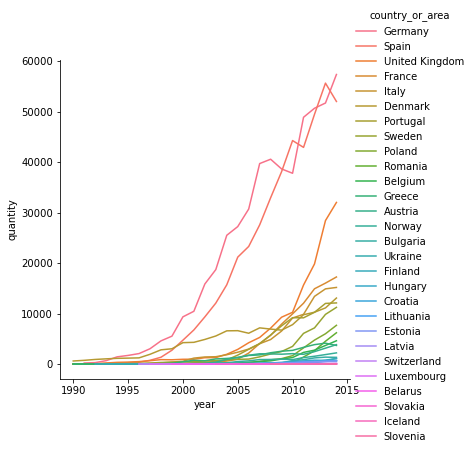

In [17]:
df_europe_elec_total_wind = df_europe[df_europe['commodity_transaction'] == 'Electricity - total wind production'].copy().sort_values('quantity', ascending=False)

sns.relplot(x='year', y='quantity',
           data=df_europe_elec_total_wind,
           kind='line',
           hue='country_or_area')

plt.show

In [18]:
df_europe[(df_europe['category'] == 'wind_electricity') & (df_europe['country_or_area'] == 'Germany')]

country_or_area                commodity_transaction  year  \
88562         Germany  Electricity - total wind production  2014   
88563         Germany  Electricity - total wind production  2013   
88564         Germany  Electricity - total wind production  2012   
88565         Germany  Electricity - total wind production  2011   
88566         Germany  Electricity - total wind production  2010   
88567         Germany  Electricity - total wind production  2009   
88568         Germany  Electricity - total wind production  2008   
88569         Germany  Electricity - total wind production  2007   
88570         Germany  Electricity - total wind production  2006   
88571         Germany  Electricity - total wind production  2005   
88572         Germany  Electricity - total wind production  2004   
88573         Germany  Electricity - total wind production  2003   
88574         Germany  Electricity - total wind production  2002   
88575         Germany  Electricity - total wind production  2001   
88576         Germany  Electricity - total wind production  2000   
88577         Germany  Electricity - total wind production  1999   
88578         Germany  Electricity - total wind production  1998   
88579         Germany  Electricity - total wind production  1997   
88580         Germany  Electricity - total wind production  1996   
88581         Germany  Electricity - total wind production  1995   
88582         Germany  Electricity - total wind production  1994   
88583         Germany  Electricity - total wind production  1993   
88584         Germany  Electricity - total wind production  1992   
88585         Germany  Electricity - total wind production  1991   

                          unit  quantity  quantity_footnotes          category  
88562  Kilowatt-hours, million   57357.0                 NaN  wind_electricity  
88563  Kilowatt-hours, million   51708.0                 NaN  wind_electricity  
88564  Kilowatt-hours, million   50670.0                 NaN  wind_electricity  
88565  Kilowatt-hours, million   48883.0                 NaN  wind_electricity  
88566  Kilowatt-hours, million   37793.0                 NaN  wind_electricity  
88567  Kilowatt-hours, million   38647.0                 NaN  wind_electricity  
88568  Kilowatt-hours, million   40574.0                 NaN  wind_electricity  
88569  Kilowatt-hours, million   39713.0                 NaN  wind_electricity  
88570  Kilowatt-hours, million   30710.0                 NaN  wind_electricity  
88571  Kilowatt-hours, million   27229.0                 NaN  wind_electricity  
88572  Kilowatt-hours, million   25509.0                 NaN  wind_electricity  
88573  Kilowatt-hours, million   18713.0                 NaN  wind_electricity  
88574  Kilowatt-hours, million   15856.0                 NaN  wind_electricity  
88575  Kilowatt-hours, million   10456.0                 NaN  wind_electricity  
88576  Kilowatt-hours, million    9352.0                 NaN  wind_electricity  
88577  Kilowatt-hours, million    5528.0                 NaN  wind_electricity  
88578  Kilowatt-hours, million    4593.0                 NaN  wind_electricity  
88579  Kilowatt-hours, million    3034.0                 NaN  wind_electricity  
88580  Kilowatt-hours, million    2078.0                 NaN  wind_electricity  
88581  Kilowatt-hours, million    1712.0                 NaN  wind_electricity  
88582  Kilowatt-hours, million    1428.0                 NaN  wind_electricity  
88583  Kilowatt-hours, million     674.0                 NaN  wind_electricity  
88584  Kilowatt-hours, million     291.0                 NaN  wind_electricity  
88585  Kilowatt-hours, million     215.0                 NaN  wind_electricity

In [19]:
df_europe_elec_total_wind.head()

country_or_area                commodity_transaction  year  \
88562         Germany  Electricity - total wind production  2014   
89231           Spain  Electricity - total wind production  2013   
89230           Spain  Electricity - total wind production  2014   
88563         Germany  Electricity - total wind production  2013   
88564         Germany  Electricity - total wind production  2012   

                          unit  quantity  quantity_footnotes          category  
88562  Kilowatt-hours, million   57357.0                 NaN  wind_electricity  
89231  Kilowatt-hours, million   55646.0                 NaN  wind_electricity  
89230  Kilowatt-hours, million   52013.0                 NaN  wind_electricity  
88563  Kilowatt-hours, million   51708.0                 NaN  wind_electricity  
88564  Kilowatt-hours, million   50670.0                 NaN  wind_electricity

As a group we have set a challenge to reproduce the qcut function in a seperate module due to an existing bug. Below is an investigation into the function

In [20]:
df_europe_elec_total_wind.loc[:,'quartile'] = pd.qcut(q=10, x=df_europe_elec_total_wind.loc[:,'quantity'], labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])
df_europe_elec_total_wind

country_or_area                commodity_transaction  year  \
88562         Germany  Electricity - total wind production  2014   
89231           Spain  Electricity - total wind production  2013   
89230           Spain  Electricity - total wind production  2014   
88563         Germany  Electricity - total wind production  2013   
88564         Germany  Electricity - total wind production  2012   
...               ...                                  ...   ...   
89116          Poland  Electricity - total wind production  1996   
88866       Lithuania  Electricity - total wind production  2000   
88867       Lithuania  Electricity - total wind production  1999   
89214        Slovenia  Electricity - total wind production  2009   
89215        Slovenia  Electricity - total wind production  2008   

                          unit  quantity  quantity_footnotes  \
88562  Kilowatt-hours, million   57357.0                 NaN   
89231  Kilowatt-hours, million   55646.0                 NaN   
89230  Kilowatt-hours, million   52013.0                 NaN   
88563  Kilowatt-hours, million   51708.0                 NaN   
88564  Kilowatt-hours, million   50670.0                 NaN   
...                        ...       ...                 ...   
89116  Kilowatt-hours, million       0.0                 NaN   
88866  Kilowatt-hours, million       0.0                 NaN   
88867  Kilowatt-hours, million       0.0                 NaN   
89214  Kilowatt-hours, million       0.0                 NaN   
89215  Kilowatt-hours, million       0.0                 NaN   

               category quartile  
88562  wind_electricity      Q10  
89231  wind_electricity      Q10  
89230  wind_electricity      Q10  
88563  wind_electricity      Q10  
88564  wind_electricity      Q10  
...                 ...      ...  
89116  wind_electricity       Q1  
88866  wind_electricity       Q1  
88867  wind_electricity       Q1  
89214  wind_electricity       Q1  
89215  wind_electricity       Q1  

[524 rows x 8 columns]

We would want the qcut func to categorize quantity data but this should be on a df that has a single unit. 

Also it would be useful to be able to categorize on grouped data e.g. countries with the most data 

In [45]:
q = importlib.reload(q)

In [31]:
df_europe_elec_total_wind['quantity']

88562    57357.0
89231    55646.0
89230    52013.0
88563    51708.0
88564    50670.0
          ...   
89116        0.0
88866        0.0
88867        0.0
89214        0.0
89215        0.0
Name: quantity, Length: 524, dtype: float64

In [46]:
test_a = q.qcut_james(x=df_europe_elec_total_wind['quantity'], q=6, labels=['Q1','Q2','Q3','Q4','Q5','Q6'])
test_a

89215    Q1
89211    Q1
89212    Q1
89213    Q1
88370    Q1
         ..
88564    Q6
88563    Q6
89230    Q6
89231    Q6
88562    Q6
Name: category, Length: 524, dtype: object

In [47]:
df_europe_elec_total_wind.loc[:,'james_quart'] = q.qcut_james(x=df_europe_elec_total_wind['quantity'], q=6, labels=['Q1','Q2','Q3','Q4','Q5','Q6'])
df_europe_elec_total_wind

country_or_area                commodity_transaction  year  \
88562         Germany  Electricity - total wind production  2014   
89231           Spain  Electricity - total wind production  2013   
89230           Spain  Electricity - total wind production  2014   
88563         Germany  Electricity - total wind production  2013   
88564         Germany  Electricity - total wind production  2012   
...               ...                                  ...   ...   
89116          Poland  Electricity - total wind production  1996   
88866       Lithuania  Electricity - total wind production  2000   
88867       Lithuania  Electricity - total wind production  1999   
89214        Slovenia  Electricity - total wind production  2009   
89215        Slovenia  Electricity - total wind production  2008   

                          unit  quantity  quantity_footnotes  \
88562  Kilowatt-hours, million   57357.0                 NaN   
89231  Kilowatt-hours, million   55646.0                 NaN   
89230  Kilowatt-hours, million   52013.0                 NaN   
88563  Kilowatt-hours, million   51708.0                 NaN   
88564  Kilowatt-hours, million   50670.0                 NaN   
...                        ...       ...                 ...   
89116  Kilowatt-hours, million       0.0                 NaN   
88866  Kilowatt-hours, million       0.0                 NaN   
88867  Kilowatt-hours, million       0.0                 NaN   
89214  Kilowatt-hours, million       0.0                 NaN   
89215  Kilowatt-hours, million       0.0                 NaN   

               category quartile james_quart  
88562  wind_electricity      Q10          Q6  
89231  wind_electricity      Q10          Q6  
89230  wind_electricity      Q10          Q6  
88563  wind_electricity      Q10          Q6  
88564  wind_electricity      Q10          Q6  
...                 ...      ...         ...  
89116  wind_electricity       Q1          Q1  
88866  wind_electricity       Q1          Q1  
88867  wind_electricity       Q1          Q1  
89214  wind_electricity       Q1          Q1  
89215  wind_electricity       Q1          Q1  

[524 rows x 9 columns]

In [ ]:
# def data_quality_by_column(df,column_name):
#     df_working = df.copy()
#     df_working = df_working.values_count(column_name).sort_values(column_name)
    

In [51]:
df_working = df.copy()
df_working_ser1 = df_working.value_counts('country_or_area').sort_values(ascending = False)
df_working_ser2 = pd.qcut(q=6, x=df_working_ser1, labels=['q6','q5','q4','q3','q2','q1'])
df_working_df = df_working_ser2.to_frame(name='country_rank').reset_index()
df_working_df
pd.merge(left=df_working, right=df_working_df, how='left', on='country_or_area')


country_or_area                          commodity_transaction  year  \
832375   United States    Natural gas (including LNG) - stock changes  2000   
832373   United States    Natural gas (including LNG) - stock changes  2002   
832362   United States    Natural gas (including LNG) - stock changes  2013   
832380   United States    Natural gas (including LNG) - stock changes  1995   
832322         Ukraine    Natural gas (including LNG) - stock changes  2010   
...                ...                                            ...   ...   
122392   USSR (former)  Lignite brown coal - total resources in place  1990   
492345           China                Coal - total resources in place  2014   
492047           China                    Coal - total known reserves  2014   
492267   United States                    Coal - total known reserves  2014   
492581   United States                Coal - total resources in place  2014   

                          unit      quantity  quantity_footnotes  \
832375              Terajoules -8.643480e+05                 NaN   
832373              Terajoules -5.624140e+05                 NaN   
832362              Terajoules -5.514900e+05                 NaN   
832380              Terajoules -4.933800e+05                 NaN   
832322              Terajoules -4.772630e+05                 NaN   
...                        ...           ...                 ...   
122392  Metric tons,  thousand  3.257000e+09                 NaN   
492345  Metric tons,  thousand  5.462672e+09                 NaN   
492047  Metric tons,  thousand  5.462672e+09                 NaN   
492267  Metric tons,  thousand  6.680329e+09                 NaN   
492581  Metric tons,  thousand  6.680329e+09                 NaN   

                         category country_rank  
832375  natural_gas_including_lng           q1  
832373  natural_gas_including_lng           q1  
832362  natural_gas_including_lng           q1  
832380  natural_gas_including_lng           q1  
832322  natural_gas_including_lng           q1  
...                           ...          ...  
122392                 brown_coal           q6  
492345                  hard_coal           q1  
492047                  hard_coal           q1  
492267                  hard_coal           q1  
492581                  hard_coal           q1  

[1189482 rows x 8 columns]

In [26]:
countries_df = pd.DataFrame(c.countries_dict)

In [27]:
df_categorised = df
df_categorised.loc[:,'quartile'] = pd.qcut(q=10, x=df_categorised.loc[:,'quantity'], labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])

list_country = list(countries_df['name'])

countries_match = df[df['country_or_area'].isin(list_country)].drop_duplicates('country_or_area')[['country_or_area', 'quartile']]
countries_no_match = df[~df['country_or_area'].isin(list_country)].drop_duplicates('country_or_area')[['country_or_area', 'quartile']]
countries_match.sort_values('country_or_area')

country_or_area quartile
9994      Afghanistan       Q1
60402         Albania       Q4
14306         Algeria       Q3
22857         Andorra       Q1
62015          Angola       Q5
...               ...      ...
608        Uzbekistan       Q3
25650         Vanuatu       Q1
21617           Yemen       Q1
12102          Zambia       Q2
8288         Zimbabwe       Q1

[162 rows x 2 columns]

In [28]:
countries_no_match.sort_values('country_or_area')
# countries_no_match[countries_not_in['quartile'] == 'Q1'].sort_values('quartile')

country_or_area quartile
6448             American Samoa       Q1
91568                  Anguilla       Q7
99114       Antarctic Fisheries       Q2
22928                     Aruba       Q1
62262                   Bermuda       Q1
...                         ...      ...
29835                  Viet Nam       Q9
13089     Wallis and Futuna Is.       Q3
73690  Yemen Arab Rep. (former)       Q9
21633      Yemen, Dem. (former)       Q1
12101  Yugoslavia, SFR (former)       Q2

[81 rows x 2 columns]

In [29]:
list_no_match = countries_df[~countries_df['name'].isin(df['country_or_area'])]['name']
list_no_match

19                              Bolivia
27     Democratic Republic of the Congo
28                Republic of the Congo
29                       CÃ´te d'Ivoire
32           People's Republic of China
36                           Cape Verde
38                       Czech Republic
55                           The Gambia
65                  Republic of Ireland
69                                 Iran
78                          North Korea
79                          South Korea
91                            Macedonia
107          Kingdom of the Netherlands
124                              Russia
135                          San Marino
139            SÃ£o TomÃ© and PrÃ­ncipe
140                               Syria
150                            Tanzania
156                        Vatican City
157                           Venezuela
158                             Vietnam
166            Central African Republic
170                          East Timor
175                                Laos
